# Model Evaluation

# Introduction to Model Evaluation Project

This project demonstrates comprehensive techniques for evaluating machine learning models, focusing on three main areas:

## Project Overview
This notebook explores various model evaluation techniques essential for assessing the performance and reliability of machine learning models. We use multiple real-world datasets and implement different evaluation methods to provide a thorough understanding of model assessment.

## Key Components

1. **Cross Validation Techniques**
   - Explores different cross-validation methods
   - Demonstrates how to avoid overfitting
   - Compares various splitting strategies
   - Uses the Breast Cancer dataset

2. **ROC Curve and AUC Analysis**
   - Implements ROC curve visualization using Plotly
   - Explores threshold selection
   - Compares multiple models using ROC-AUC
   - Uses the Pima Indians Diabetes dataset

3. **Model Performance Analysis**
   - Implements multiple classification models
   - Generates detailed classification reports
   - Creates confusion matrices
   - Uses the Breast Cancer dataset with ensemble methods

## Datasets Used
1. Breast Cancer Dataset - For classification and cross-validation
2. Pima Indians Diabetes Dataset - For ROC curve analysis

## Tools and Libraries
- scikit-learn - For machine learning models and evaluation metrics
- Plotly - For interactive visualizations
- Matplotlib/Seaborn - For statistical visualizations
- XGBoost - For gradient boosting implementation

## Project Goals
- Demonstrate various model evaluation techniques
- Compare different cross-validation strategies
- Visualize model performance metrics
- Implement best practices in model evaluation

## Cross Validation Techniques

In [2]:
import pandas as pd
df = pd.read_csv('cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Independent and Dependent Features
X= df.iloc[:, 2:]
y = df.iloc[:, 1]

In [4]:
X=X.dropna(axis=1)

In [5]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

1. ### Normal Train Test Split

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)

0.9532163742690059


### 2. K Fold Cross Validation

In [8]:
from sklearn.model_selection import KFold
model=DecisionTreeClassifier()
k_fold_validation = KFold(10)

In [9]:
import numpy as np
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, X, y, cv=k_fold_validation)
print(results)
print(np.mean(results))

[0.92982456 0.9122807  0.89473684 0.94736842 0.87719298 0.98245614
 0.9122807  0.96491228 0.92982456 0.94642857]
0.9297305764411027


### 3. Stratified K-fold Cross Validation

In [10]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=skfold)
print(scores)
print(np.mean(scores))

[0.9122807  0.92105263 0.92105263 0.90350877 0.90265487]
0.9121099208197485


### 4. Leave One Out Cross Validation(LOOCV)

In [11]:
from sklearn.model_selection import LeaveOneOut
leave_validation = LeaveOneOut()
results = cross_val_score(model, X, y, cv=leave_validation)

In [13]:
print(np.mean(results))

0.9209138840070299


## ROC Curve and AUC

In [14]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
y_scores = model.predict_proba(X_test)[:,1]

In [19]:
y_scores

array([0.27586903, 0.18843744, 0.11448686, 0.16356417, 0.47152977,
       0.44179849, 0.01545853, 0.66074186, 0.5414565 , 0.77731057,
       0.25593784, 0.89733723, 0.33620173, 0.30303686, 0.08198093,
       0.38091458, 0.13935015, 0.07479884, 0.86673681, 0.56141471,
       0.20840356, 0.07738928, 0.53966112, 0.09458035, 0.53953079,
       0.88555162, 0.12431915, 0.03016067, 0.2515242 , 0.11580928,
       0.91112566, 0.87074344, 0.7653633 , 0.83752132, 0.61666084,
       0.68332766, 0.96812343, 0.24361755, 0.5114927 , 0.73611598,
       0.06983456, 0.59407646, 0.58364387, 0.32723692, 0.02759327,
       0.50240129, 0.63933303, 0.22534469, 0.36056716, 0.95628861,
       0.0488972 , 0.66097736, 0.81169352, 0.24553199, 0.09325283,
       0.04152057, 0.77814628, 0.00570369, 0.40862278, 0.75695934,
       0.74135944, 0.35193411, 0.19236106, 0.20495346, 0.0768767 ,
       0.62714794, 0.05091387, 0.73286803, 0.03691754, 0.71592785,
       0.6752486 , 0.0701639 , 0.1811509 , 0.11429493, 0.09116

In [20]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [21]:
thresholds

array([       inf, 0.9711592 , 0.96812343, 0.95628861, 0.90262847,
       0.89733723, 0.800966  , 0.77814628, 0.77793971, 0.77731057,
       0.73286803, 0.72424352, 0.68332766, 0.6752486 , 0.66097736,
       0.66074186, 0.65559843, 0.64966174, 0.63933303, 0.61666084,
       0.60581211, 0.58364387, 0.55037352, 0.53953079, 0.53418967,
       0.5029647 , 0.50240129, 0.42043779, 0.42019423, 0.40862278,
       0.38091458, 0.33903185, 0.32723692, 0.30303686, 0.30267739,
       0.25731401, 0.24068866, 0.22534469, 0.22514273, 0.20840356,
       0.20495346, 0.16356417, 0.14043993, 0.12822538, 0.12698868,
       0.11448686, 0.11429493, 0.04152057, 0.04048371, 0.00417265])

In [22]:
import plotly.graph_objects as go
import numpy as np


# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve'
)

# Only label every nth point to avoid cluttering
n = 10  
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices], 
    y=tpr[indices], 
    mode='markers+text', 
    name='Threshold points', 
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]], 
    textposition='top center'
)


# Diagonal line
trace2 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=False
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


In [23]:
#Assume that fpr, tpr, thresholds have already been calculated
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)


Optimal threshold is: 0.550373524883518


### Compare two models using ROC-AUC Curve

In [24]:
import numpy as np
import plotly.graph_objects as go 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# SVM requires feature scaling for better performance
scaler = StandardScaler()
X_train_S = scaler.fit_transform(X_train)
X_test_S = scaler.fit_transform(X_test)

# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_S, y_train)
lr_scores = lr_model.predict_proba(X_test_S)[:, 1]

# SVM Model
svm_model = SVC(probability=True)
svm_model.fit(X_train_S,y_train)
svm_scores = svm_model.predict_proba(X_test_S)[:, 1]

# Generate ROC Curve data for Logistic Regression Model
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_scores)
lr_auc = roc_auc_score(y_test, lr_scores)

# Generate ROC Curve data for SVM Model
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_scores)
svm_auc = roc_auc_score(y_test, svm_scores)

# Generate a trace for the Logistic Regression ROC curve
trace0 = go.Scatter(
    x=lr_fpr,
    y=lr_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {lr_auc:.2f})'
)

# Generate a trace for the SVM ROC curve
trace1 = go.Scatter(
    x=svm_fpr,
    y=svm_tpr,
    mode='lines',
    name=f'SVM (Area = {svm_auc:.2f})'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()

## Acuracy Score and Classification Report

### Model Training & Hyperparameter Tuning

In this project, model training was performed using standard machine learning algorithms such as Decision Tree, Logistic Regression, Support Vector Machine, Random Forest, Gradient Boosting, and XGBoost. Each model was trained on the respective training datasets using default or basic parameter settings provided by the scikit-learn and XGBoost libraries. The focus was on evaluating and comparing the baseline performance of these models using various cross-validation and evaluation metrics. It is important to note that no explicit hyperparameter tuning (such as Grid Search or Randomized Search) was implemented in this analysis. As a result, the reported results reflect the out-of-the-box performance of each model, and further improvements could potentially be achieved by incorporating systematic hyperparameter optimization techniques in future work.

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)




In [27]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)
xgb_model= XGBClassifier(random_state=42, eval_metric='logloss')

# Train the models
print("Training Random Forest")
rf_model.fit(X_train, y_train)

print("Training GBM...")
gbm_model.fit(X_train, y_train)

print("Training XGBoost")
xgb_model.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_gbm = gbm_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Get probability predictions for ROC Curve
pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
pred_proba_gbm = gbm_model.predict_proba(X_test)[:, 1]
pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

Training Random Forest
Training GBM...
Training XGBoost


In [28]:
print("--- Random Forest Classification Report ---")
print(classification_report(y_test, y_pred_rf, target_names=cancer.target_names))

print("\n--- GBM Classification Report ---")
print(classification_report(y_test, y_pred_gbm, target_names=cancer.target_names))

print("\n--- XGBoost Classification Report ---")
print(classification_report(y_test, y_pred_xgb, target_names=cancer.target_names))



--- Random Forest Classification Report ---
              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        63
      benign       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


--- GBM Classification Report ---
              precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        63
      benign       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


--- XGBoost Classification Report ---
              precision    recall  f1-score   support

   malignant       0.94      0.97      0.95        63
      benign       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro a

#### Confusion Matrix

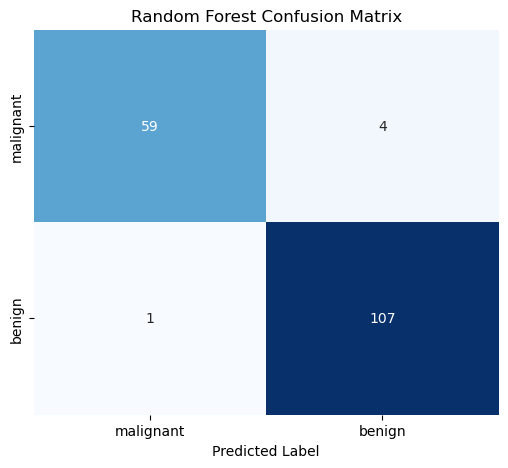

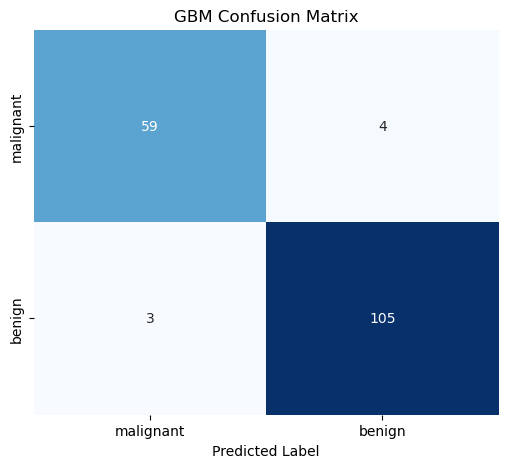

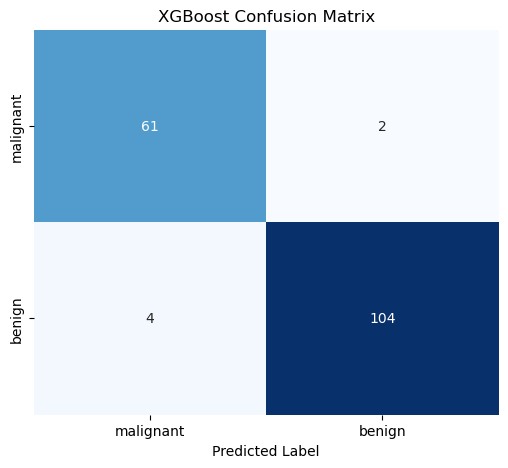

In [29]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=cancer.target_names, yticklabels=cancer.target_names)
    plt.xlabel("Predicted Label")
    plt.title(title)
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test,y_pred_rf, "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_gbm, 'GBM Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost Confusion Matrix')

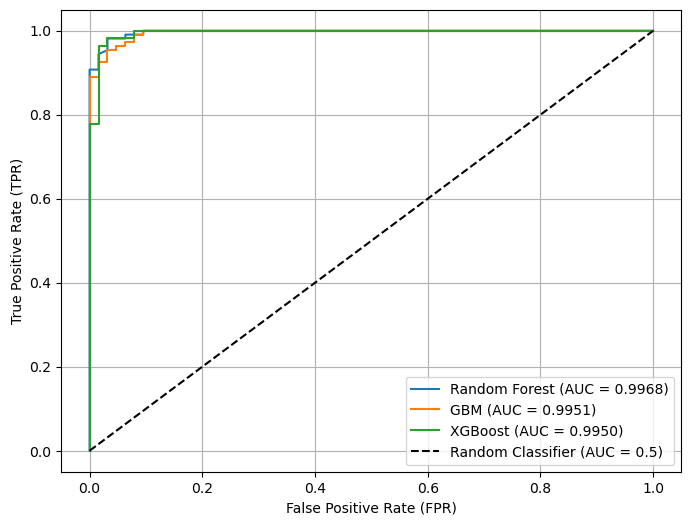

In [32]:
# Calculate ROC AUC Scores
rf_roc_auc = roc_auc_score(y_test, pred_proba_rf)
gbm_roc_auc = roc_auc_score(y_test, pred_proba_gbm)
xgb_roc_auc = roc_auc_score(y_test, pred_proba_xgb)

# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, pred_proba_rf)
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, pred_proba_gbm)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, pred_proba_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_roc_auc:.4f})')
plt.plot(fpr_gbm, tpr_gbm, label=f'GBM (AUC = {gbm_roc_auc:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()

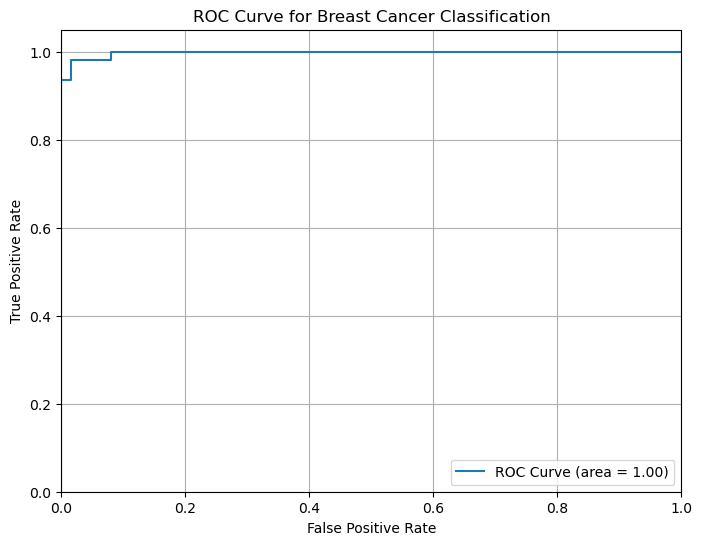

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, RocCurveDisplay

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Phot the ROC Curve using matplotlib
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



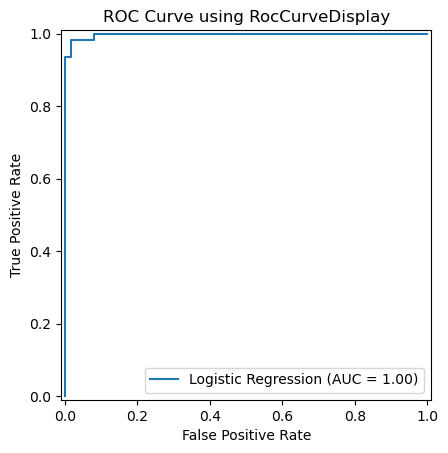

In [36]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.title('ROC Curve using RocCurveDisplay')
plt.show()

# Conclusion

This project provided a comprehensive exploration of model evaluation techniques in supervised learning, using both the Breast Cancer and Pima Indians Diabetes datasets. We implemented a variety of cross-validation strategies, compared multiple classification algorithms, and visualized model performance using ROC curves, confusion matrices, and classification reports. The results highlighted the importance of robust evaluation methods and the value of comparing different models to select the most effective approach for a given problem.

While all models were trained using default parameters, the analysis demonstrated that ensemble methods such as Random Forest, Gradient Boosting, and XGBoost consistently delivered strong performance on the classification tasks. Additionally, ROC-AUC analysis and threshold visualization provided deeper insights into model discrimination capabilities and decision boundaries.

Future work could focus on systematic hyperparameter tuning and the inclusion of additional evaluation metrics to further optimize model performance. Overall, this project serves as a practical guide for applying and interpreting key model evaluation techniques in real-world machine learning workflows.

## Future Work

- Implement systematic hyperparameter tuning (e.g., Grid Search, Randomized Search) to optimize model performance.
- Explore additional machine learning algorithms, including deep learning models, for further comparison.
- Incorporate feature engineering and selection techniques to improve model accuracy and interpretability.
- Evaluate models using additional metrics such as F1-score, precision-recall curves, and Matthews correlation coefficient.
- Apply advanced ensemble methods and stacking techniques for potentially better results.
- Investigate the impact of data imbalance and apply resampling strategies if necessary.
- Extend the analysis to multiclass or multilabel classification problems.
- Deploy the best-performing model as a web service or interactive application for real-world use.
- Automate the entire workflow using pipelines for reproducibility and scalability.
- Document and visualize the workflow using tools like MLflow or DVC for experiment tracking.